# Spektron on MNIST dataset 

In [1]:
import tensorflow as tf
from data import MNISTDataHandler
import numpy as np
import PIL.Image as pil
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import  graphviz_layout
import networkx as nx
import pandas as pd
import seaborn as sns

from modules.Components import Abstract, Context1, Context2, Actuator, Spektron
from modules.Veri import Veri
from modules.BaseStructure import BaseStructure
from pywt import wavedec
import random

In [2]:
def prepareImage(image,bands):
  arr = np.empty([28, 28], dtype=np.int)
  for i in range(28):
    for j in range(28):
      a=0
      for k in range(len(bands)):
        if(image[i][j] >=bands[k]):
          a=k+1
          break
      arr[i,j]=a
  return arr#(np.array(arr, dtype='int')).reshape(28,28)
######################################################################
def diffPrepareImage(image, nr_of_bands)    :
    #return (np.array(nr_of_bands*image, dtype='int')).reshape(28,28)
    image = image- np.min(image)    
    return (np.round(nr_of_bands*image/np.max(image)))
#def transformImage(image):
    
    
######################################################################
def takeSampleData(sample, nr_of_images, show =False):
  resimler = []
  batch_x, batch_y = dh.sample_pair(nr_of_images,sample) 
  
  for i in range(nr_of_images):
      resimler.append((np.array(batch_x[i], dtype='float')).reshape(28,28))
  return resimler
  for i in range(nr_of_images):
    testImage = (np.array(batch_x[i], dtype='float')).reshape(28,28)
    if(show):
      img = pil.fromarray(np.uint8(testImage * 255) , 'L')
      img.show()

  testImage = (np.array(batch_x[0], dtype='float')).reshape(28,28)
  return testImage

In [3]:
dh = MNISTDataHandler("/home/matei/Documents/code/taniyanAgac/MNIST_data", is_train=True)

Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/matei/Documents/code/taniyanAgac/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/matei/Documents/code/taniyanAgac/MNIST_data/train-labels-idx1-ubyte.gz


In [4]:
def ciz(testImage):
    plt.imshow(testImage, cmap='gray')
    plt.show()

In [5]:
imgs= []
for i in range(10):
  imgs.append(takeSampleData(i,20))
v=Veri()
imgs = v.mergeList(imgs)

#for i in range(len(imgs)):    
#    ciz(imgs[i])

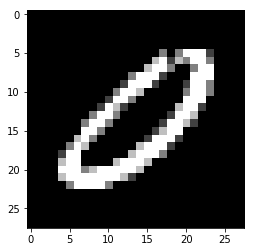

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 5 10 10 10 2 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 10 2 7 5 10 10 5 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 10 10 5 0 0 5 10 10 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 5 10 10 10 2 0 0 0 10 10 10 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 2 10 10 10 2 0 0 0 2 10 10 5 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 5 10 10 7 0 0 0 0 0 5 10 10 5 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 2 10 10 5 0 0 0 0 0 0 10 10 10 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 2 10 7 2 0 0 0 0 0 0 7 10 10 2 0 0 0 0 0 
0 0 0 0 0 0 0 0 5 10 10 5 0 0 0 0 0 0 2 10 10 7 0 0 0 0 0 0 
0 0 0 0 0 0 0 5 10 10 5 0 0 0 0 0 0 2 10 10 7 2 0 0 0 0 0 0 
0 0 0 0 0 0 0 10 10 5 0 0 0 0 0 0 2 7 10 10 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 7 10 5 0 0 0 0 0 0 2 10 10 10 2

In [6]:
ciz(imgs[0])
for i in range(28):
    for j in range(28):
        print (int(10*imgs[0][i][j]),end=" ")
    print()
print()
print()
a= diffPrepareImage(imgs[0],3)
for i in range(28):
    for j in range(28):
        print (int(1*a[i][j]),end=" ")
    print()

In [7]:
linie = imgs[0][10]
a=v.getWaveletCoefs(linie)

print(len(linie))
print(len(a))

print(np.round(linie,1))
print()
print(np.round(a,1))

28
29
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 1.  1.  0.7 0.  0.  0.
 0.  0.  0.5 1.  1.  0.5 0.  0.  0.  0. ]

[ 0.8  0.8 -0.8  0.8  0.  -0.8 -1.1  0.   0.   0.  -0.3  0.6  0.   0.
  0.   0.   0.   0.   0.   0.  -0.4  0.   0.5  0.   0.  -0.4  0.4  0.
  0. ]


In [8]:
print(len(linie))
print(len(a))
len(imgs)

28
29


200

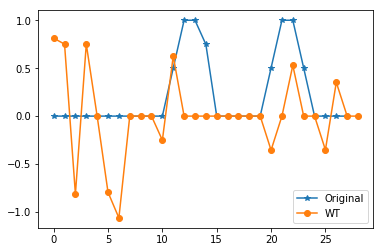

In [9]:
plt.plot(linie,'-*')
plt.plot(a,'-o')
plt.legend(["Original", "WT"])



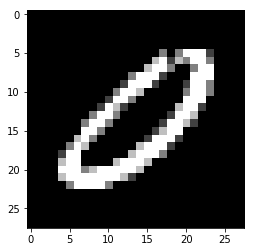

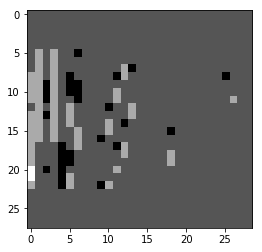

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 5 10 10 10 2 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 10 2 7 5 10 10 5 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 10 10 5 0 0 5 10 10 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 5 10 10 10 2 0 0 0 10 10 10 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 2 10 10 10 2 0 0 0 2 10 10 5 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 5 10 10 7 0 0 0 0 0 5 10 10 5 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 2 10 10 5 0 0 0 0 0 0 10 10 10 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 2 10 7 2 0 0 0 0 0 0 7 10 10 2 0 0 0 0 0 
0 0 0 0 0 0 0 0 5 10 10 5 0 0 0 0 0 0 2 10 10 7 0 0 0 0 0 0 
0 0 0 0 0 0 0 5 10 10 5 0 0 0 0 0 0 2 10 10 7 2 0 0 0 0 0 0 
0 0 0 0 0 0 0 10 10 5 0 0 0 0 0 0 2 7 10 10 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 7 10 5 0 0 0 0 0 0 2 10 10 10 2

In [10]:
wt= np.empty([28, 29], dtype=np.float)
for j in range(28):
    linie = imgs[0][j]
    wt[j]=v.getWaveletCoefs(linie)
    

a = diffPrepareImage(wt,4-1)

ciz(imgs[0])
ciz(a*15)


for i in range(28):
    for j in range(28):
        print (int(10*imgs[0][i][j]),end=" ")
    print()
print()
print()

for i in range(28):
    for j in range(28):
        print (int(1*a[i][j]),end=" ")
    print()


In [11]:
ana = BaseStructure()
for k in range(len(imgs)):
    for i in range(2):
        wt= np.empty([28, 29], dtype=np.float)
        for j in range(28):
            linie = imgs[k][j]
            wt[j]=v.getWaveletCoefs(linie)
        a = diffPrepareImage(wt,3)
        for j in range(28):
            ana.addBranchEntropy(a[j])


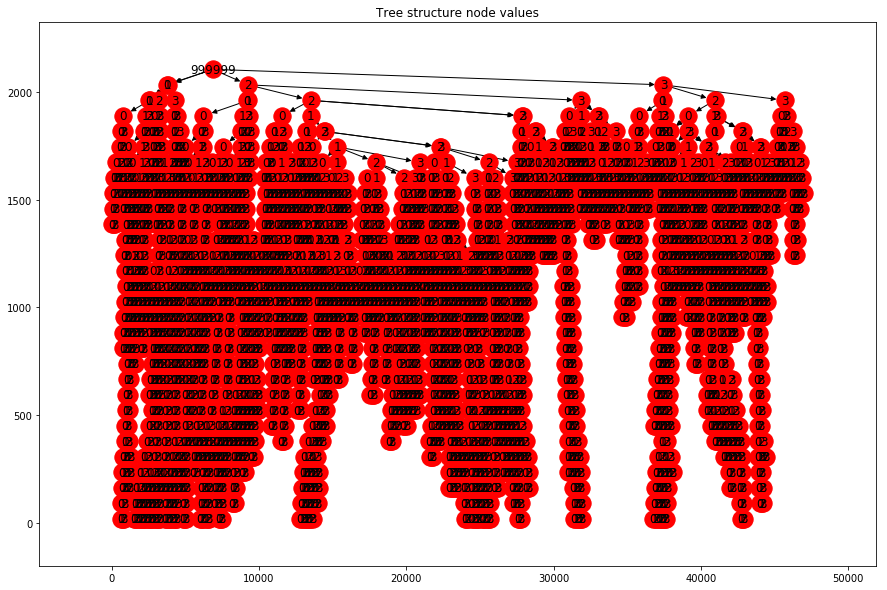

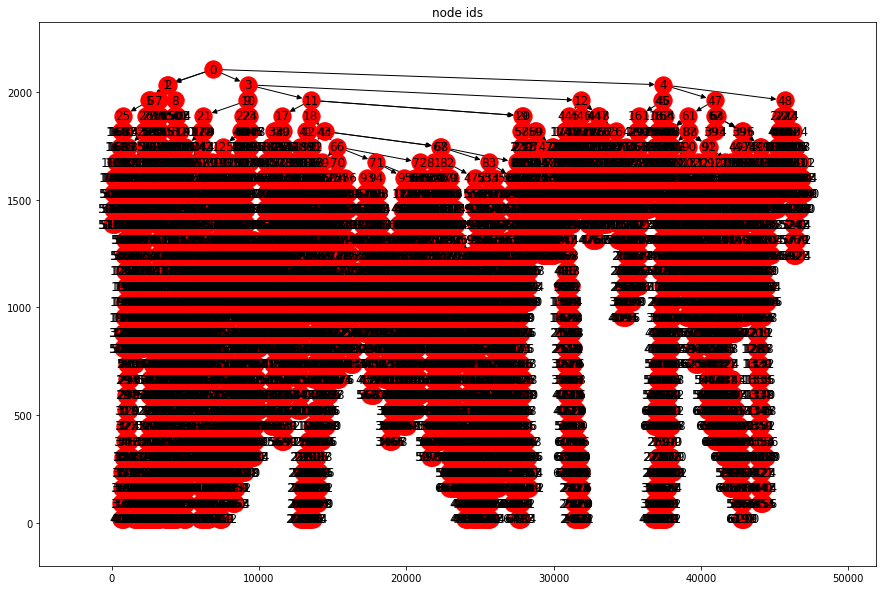

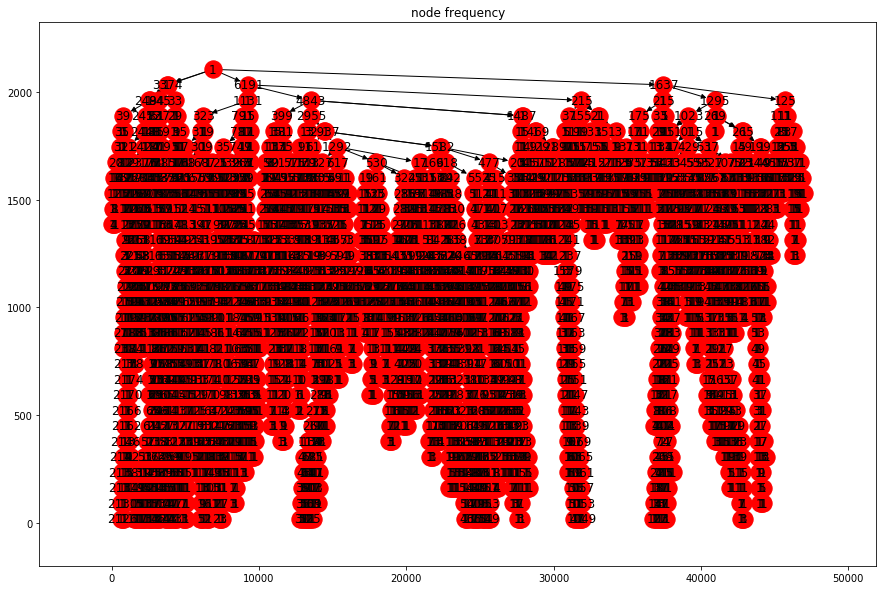

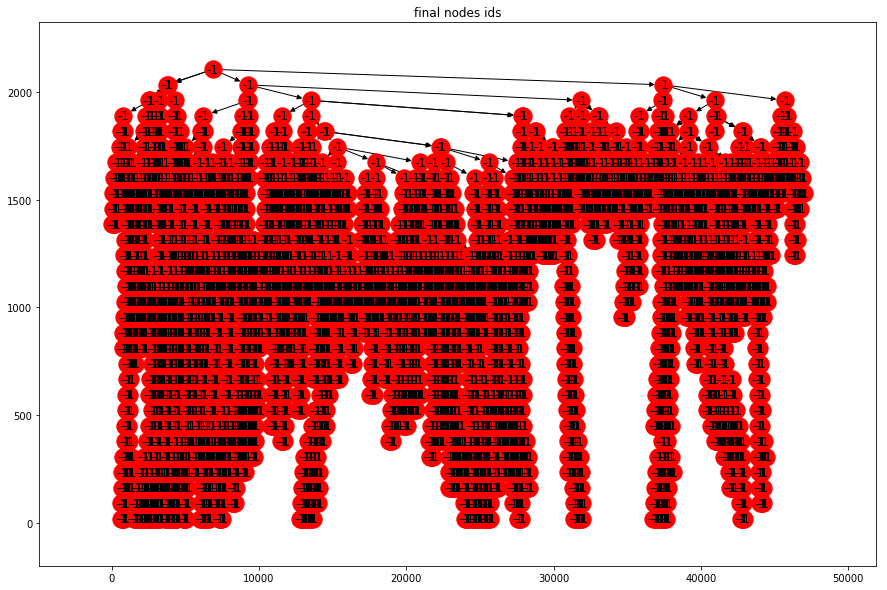

In [12]:
ana.plotGraph()

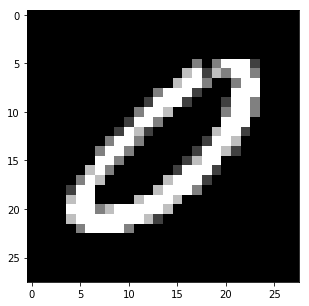

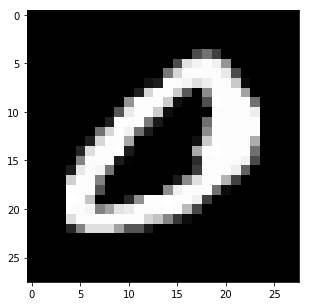

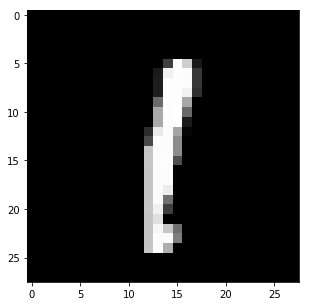

402 402 402 402 402 -5202 -5630 -1739 -5890 -697 -697 -842 -2426 -4662 -309 -4122 -3082 -3306 -858 -858 -5014 -5190 -1966 402 402 402 402 402 
831 831 831 831 -6163 -6207 -6319 -6318 -5474 -1652 -6322 -5270 -5270 -5270 -5270 -5270 -5270 -646 -634 -4823 -5943 -5279 -6055 4347 831 831 831 831 
402 402 402 402 4750 4750 -4094 -4510 -5166 -4483 -4130 -4130 -4442 -4050 -5683 -4395 -4395 -4395 -4395 -5686 -5686 -6038 -5006 -4514 402 402 402 402 


In [13]:
plt.rcParams['figure.figsize'] = [5, 5]
samples = [0,19,20]
ciz(imgs[samples[0]])
ciz(imgs[samples[1]])
ciz(imgs[samples[2]])


for i in range(len(samples)):
    wt= np.empty([28, 29], dtype=np.float)
    for j in range(28):
        linie = imgs[i][j]
        wt[j]=v.getWaveletCoefs(linie)


    a = diffPrepareImage(wt,4-1)
    for j in range(len(a)):
        #print(a[i])
        print (ana.checkMatchingBranch(input_data=a[j]), end= " ")
    print()

In [14]:
sonAgac = BaseStructure()
samples = range(10)#len(imgs))# [0,19,20]


for i in range(len(samples)):
    wt= np.empty([28, 29], dtype=np.float)
    for j in range(28):
        linie = imgs[i][j]
        wt[j]=v.getWaveletCoefs(linie)


    a = diffPrepareImage(wt,4-1)
    dal = []
    for j in range(len(a)):        
        dal.append(ana.checkMatchingBranch(input_data=a[j]))
    
    sonAgac.addBranch(dal)

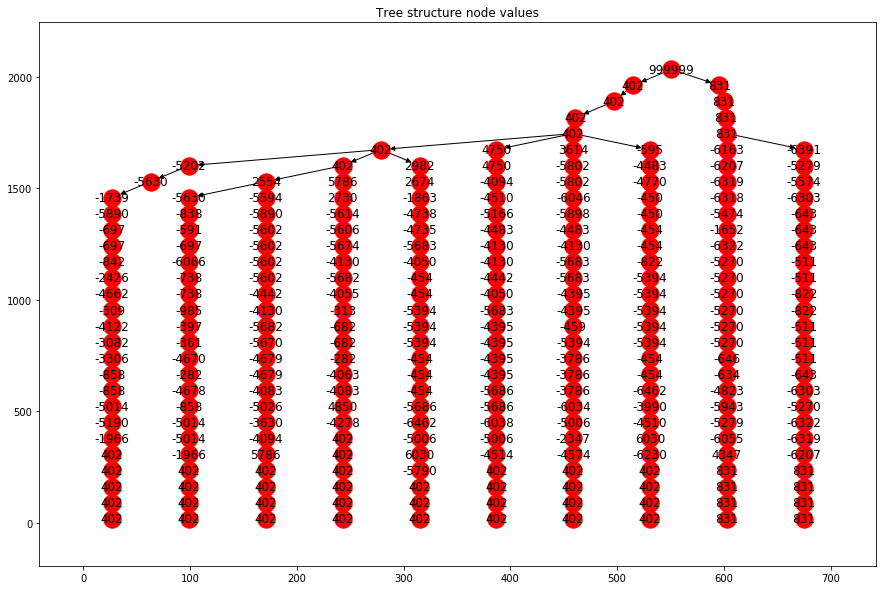

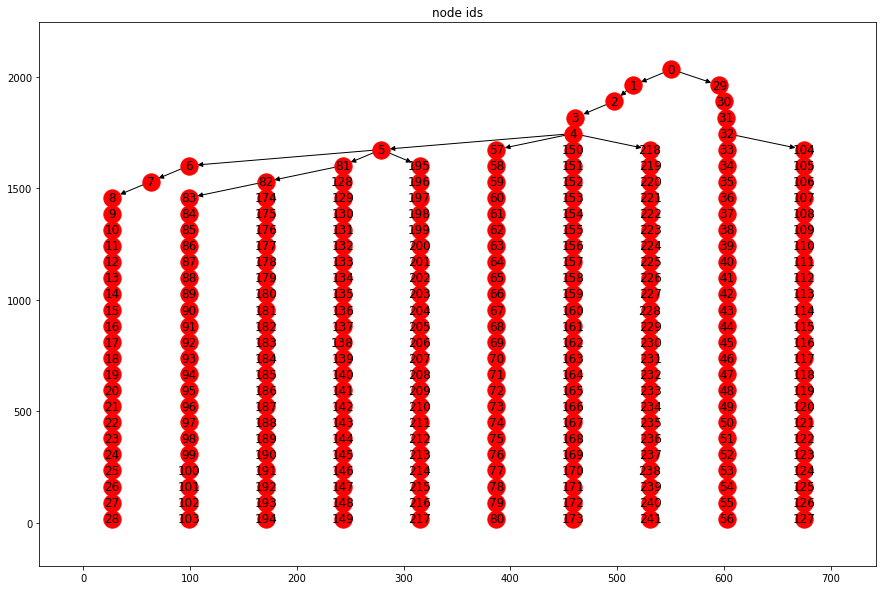

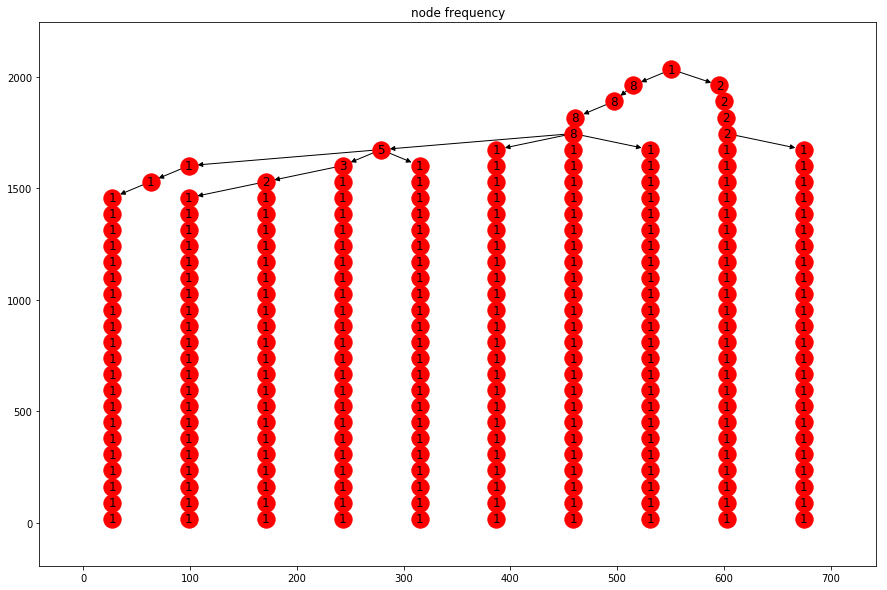

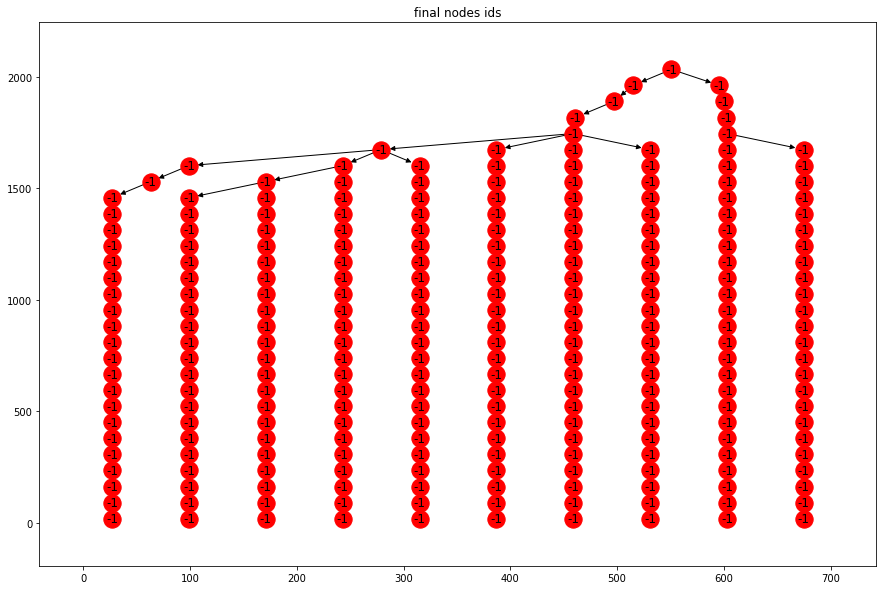

In [15]:
sonAgac.plotGraph()

In [37]:
print(len(imgs))

200


In [1]:






def main():
  i=3
  #for i in range(4):
  testImage = takeSampleData(i,1)
  for i in range(28):
    print("\n",i,end="\t")
    for j in range(28):
      print(int(testImage[i][j]),end=" ")



  a=prepareImage(testImage,[64,128,192])

  print()
  print()
  for i in range(28):
    print("\n",i,end="\t")
    for j in range(28):
      print(int(a[i][j]),end=" ")


  img = pil.fromarray(np.uint8(a*50 ) , 'L')
  img.show()

  v = Veri()

  ana = BaseStructure()

  #ana.addBranchEntropy([0,1,2,3,4])
  #ana.addBranchEntropy([0,1,2,3,4])
  #ana.addBranchEntropy([0,1,2,3,4])
  #ana.addBranchEntropy([0,1,2,3,4])
  #ana.addBranchEntropy([0,1,2,4,4])



  ana.agCizdir()


  return 0

  

  

if __name__ == "__main__":
  

# TODO
# 1. encode image for input
# 2. build tree from input
# 3. display tree
# 4. clasify
# 5. deeper thinking
# 6. 

SyntaxError: unexpected EOF while parsing (<ipython-input-1-6c2a6828df9f>, line 61)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
frames=200, interval=20, blit=True)

TypeError: Image data cannot be converted to float

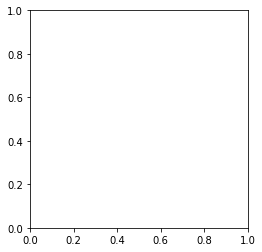

In [3]:
plt.imshow(anim)